# Data Science and Business Analytics (GRIP JULY21) Task 1 :

## Linear Regression with MATLAB

In this section we will see how MATLAB can be used to implement regression algorithm. We will start with simple linear regression involving two variables. 


## Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.


### Author: Adika Malviya

In [1]:
% Reading Training Data
disp("Data imported successfully!");
data = readmatrix('data.txt');
disp(data)

Data imported successfully!
    2.5000   21.0000
    5.1000   47.0000
    3.2000   27.0000
    8.5000   75.0000
    3.5000   30.0000
    1.5000   20.0000
    9.2000   88.0000
    5.5000   60.0000
    8.3000   81.0000
    2.7000   25.0000
    7.7000   85.0000
    5.9000   62.0000
    4.5000   41.0000
    3.3000   42.0000
    1.1000   17.0000
    8.9000   95.0000
    2.5000   30.0000
    1.9000   24.0000
    6.1000   67.0000
    7.4000   69.0000
    2.7000   30.0000
    4.8000   54.0000
    3.8000   35.0000
    6.9000   76.0000
    7.8000   86.0000



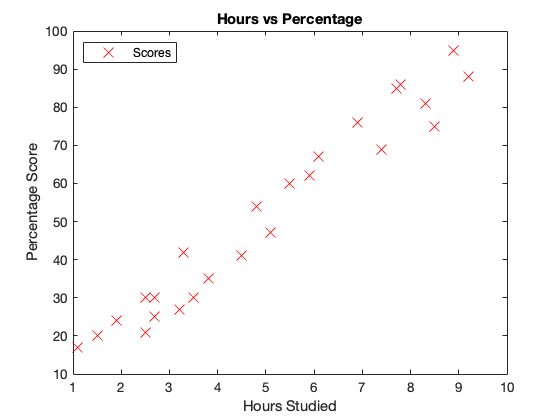

In [2]:
% Plotting the distribution of scores
x = data(:, 1);
y = data(:, 2);
A = plot(x, y, 'rx', 'MarkerSize', 10);         % Plot the data
xlabel('Hours Studied');                    % Set the x-axis label
ylabel('Percentage Score');                 % Set the y-axis label
title('Hours vs Percentage');
legend({'Scores'},'Location','northwest');

There is a positive linear relation between the number of hours studied and percentage of score.

### Training the Algorithm

In [3]:
m = length(x); % number of training examples
x = [ones(m,1),data(:,1)]; % Add a column of ones to x
theta = zeros(2, 1); % initialize fitting parameters
iterations = 1500;
alpha = 0.01;

In [4]:
%%file computeCost.m

function J = computeCost(x, y, theta)
%COMPUTECOST Compute cost for linear regression
%   J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
%   parameter for linear regression to fit the data points in X and y

% Initialize some useful values
m = length(y); % number of training examples 
J = 0;
J = (1/(2*m))*sum(((x*theta) - y).^2);
end


Created file '/Users/adikamalviya/Desktop/SPARKS/computeCost.m'.


In [5]:
%%file gradientDescent.m

function [theta, J_history] = gradientDescent(x, y, theta, alpha, num_iters)
%GRADIENTDESCENT Performs gradient descent to learn theta
%   theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
%   taking num_iters gradient steps with learning rate alpha

% Initialize some useful values
m = length(y); % number of training examples
J_history = zeros(num_iters, 1);

for iter = 1:num_iters
    theta = theta -(alpha/m)*(x')*(x*theta - y);
    % Save the cost J in every iteration    
    J_history(iter) = computeCost(x, y, theta);
end

end


Created file '/Users/adikamalviya/Desktop/SPARKS/gradientDescent.m'.


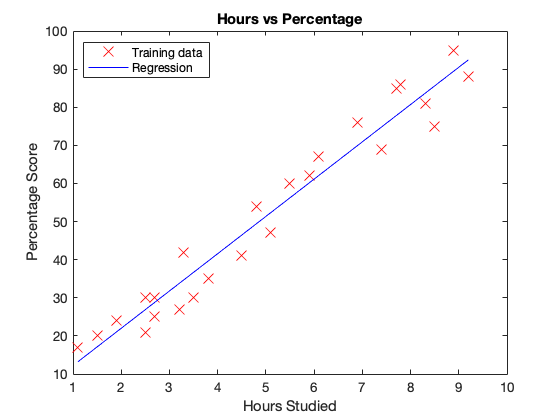

In [6]:
% plotting regression line
theta = gradientDescent(x, y, theta, alpha, iterations);
A = plot(x(:,2), y, 'rx', 'MarkerSize', 10);         % Plot the data
xlabel('Hours Studied');                    % Set the x-axis label
ylabel('Percentage Score');                 % Set the y-axis label
title('Hours vs Percentage');
hold on;
plot(x(:,2), x*theta, 'b-')
legend({'Training data','Regression'},'Location','northwest')
hold off % don't overlay any more plots on this figure

### Making Predictions

In [7]:
% Comparing Actual vs Predicted
Actual = y;
Predicted = x*theta;
T=table(Actual,Predicted)


T =

  25x2 table

    Actual    Predicted
    ______    _________

      21       26.893  
      47       52.331  
      27       33.742  
      75       85.597  
      30       36.677  
      20       17.109  
      88       92.445  
      60       56.245  
      81        83.64  
      25        28.85  
      85        77.77  
      62       60.159  
      41       46.461  
      42        34.72  
      17       13.196  
      95        89.51  
      30       26.893  
      24       21.023  
      67       62.115  
      69       74.834  
      30        28.85  
      54       49.396  
      35       39.612  
      76       69.942  
      86       78.748  



In [8]:
% Testing with own data
hours=9.25;
X = ['No of hours: ',num2str(hours)];
disp(X)
fprintf('Predicted Score: %f',theta(1)+theta(2)*hours);

No of hours: 9.25
Predicted Score: 92.934596

## Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean absolute error. 

In [9]:
err = y-(x*theta);
absoluteErr = abs(err);
meanAbsoluteErr = mean(absoluteErr);
X = ['Mean Absolute error: ',num2str(meanAbsoluteErr)];
disp(X);

Mean Absolute error: 4.9763
